## 1. Data Loading and Initial Exploration

We begin by loading the `banking_sales_data.csv` dataset and performing a basic inspection. This includes checking the structure of the data, understanding data types, reviewing summary statistics, and identifying any duplicated rows. This step ensures we understand the dataset before diving into deeper analysis.

In [45]:
# --- 1. Load and Inspect the Data ---
import pandas as pd

# Load data
df = pd.read_csv('banking_sales_data.csv')

# Basic inspection
df.info()
df.describe()
df.duplicated().sum()

# Explore key categorical variables
print(df['product_type'].value_counts())
print(df['product_name'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1584 non-null   object 
 1   region              1584 non-null   object 
 2   product_type        1584 non-null   object 
 3   product_id          1584 non-null   int64  
 4   product_name        1584 non-null   object 
 5   customers_acquired  1584 non-null   int64  
 6   avg_product_value   1584 non-null   float64
 7   marketing_spend     1584 non-null   float64
 8   churn_rate          1584 non-null   float64
 9   revenue             1584 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 123.9+ KB
product_type
Credit Card        432
Mortgage           288
Personal Loan      288
Savings Account    288
Investment         288
Name: count, dtype: int64
product_name
Platinum Card         144
CashBack Card         144
Student Card          

In [52]:
# --- 2. Prepare the Data ---
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

## 3. Time Series Analysis – Customers Acquired

To understand business growth, we analyze how many customers were acquired over time.  
We aggregate the number of customers acquired per month and plot the trend.  
This helps us identify patterns such as growth, seasonality, or stagnation.


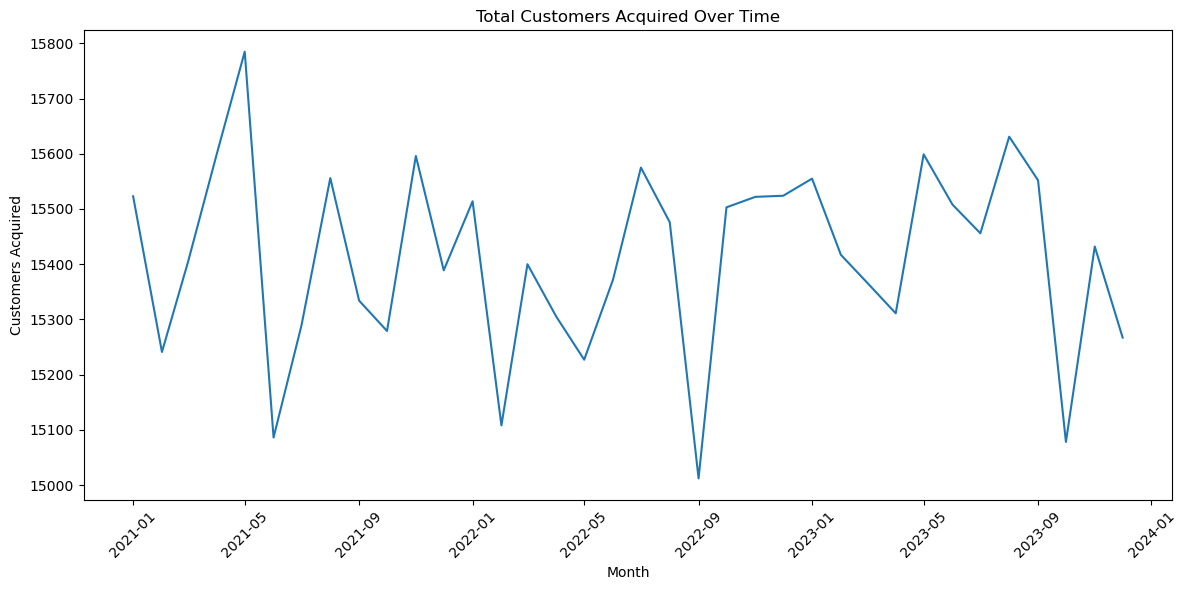

In [47]:
# --- 3. Trend: Customers Acquired Over Time ---
monthly_customers = (
    df.groupby('date')['customers_acquired']
    .sum()
    .reset_index()
    .sort_values('date')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, x='date', y='customers_acquired')
plt.title("Total Customers Acquired Over Time")
plt.xlabel("Month")
plt.ylabel("Customers Acquired")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Time Series Analysis – Churn Rate

Next, we examine churn rate over time. Monitoring churn helps us evaluate customer retention and overall business health. A consistently rising churn rate might signal issues with customer satisfaction or product fit.

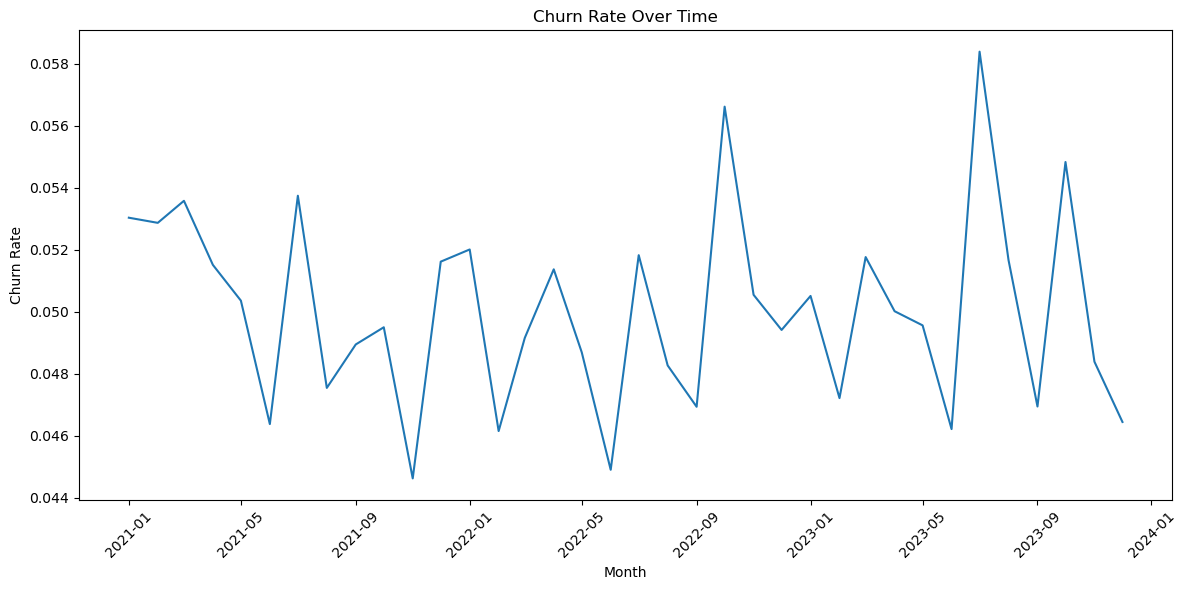

In [48]:
# --- 4. Trend: Churn Rate Over Time ---
monthly_churn = (
    df.groupby('date')['churn_rate']
    .mean()  # Use mean instead of sum for a rate
    .reset_index()
    .sort_values('date')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_churn, x='date', y='churn_rate')
plt.title("Churn Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Marketing Spend vs. Revenue by Product and Region

We explore the relationship between marketing spend and revenue by visualizing these variables across different products and regions. By adding regression lines, we assess how strongly marketing investment correlates with revenue in different business segments.

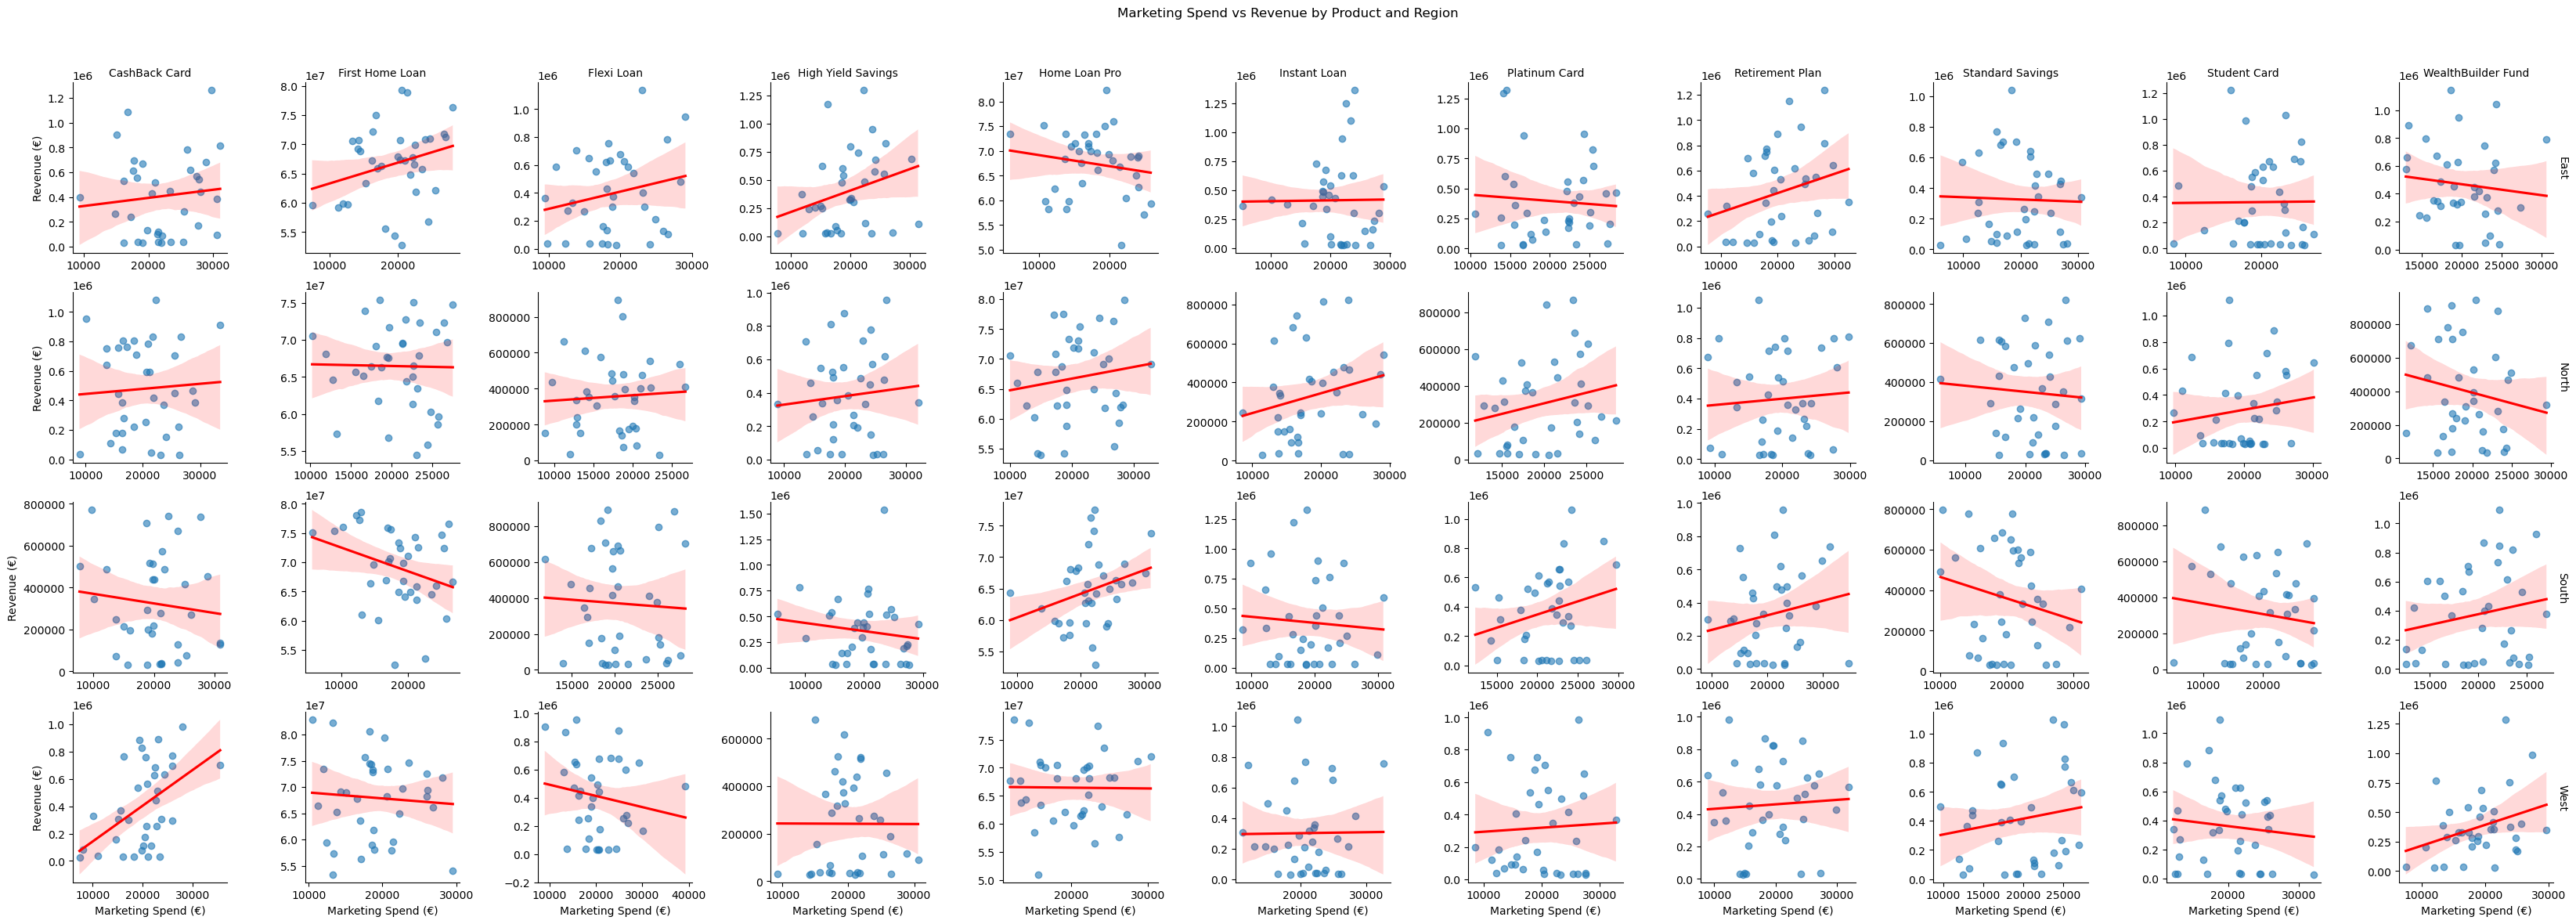

In [49]:
# --- 5. Revenue vs. Marketing Spend by Product and Region ---
grouped_prod_region = df.groupby(['product_name', 'region', 'date']).agg({
    'marketing_spend': 'sum',
    'revenue': 'sum'
}).reset_index()

grouped_prod_region['date'] = pd.to_datetime(grouped_prod_region['date'])

g = sns.FacetGrid(grouped_prod_region, row='region', col='product_name', height=3, margin_titles=True, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='marketing_spend', y='revenue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
g.set_axis_labels("Marketing Spend (€)", "Revenue (€)")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Marketing Spend vs Revenue by Product and Region')
plt.show()

## 6. Marketing Spend vs. Churn Rate by Product and Region

Here, we investigate whether increased marketing spend is associated with customer retention (i.e., lower churn rate). A negative correlation might indicate effective campaigns, while a weak or positive correlation could highlight inefficiencies.

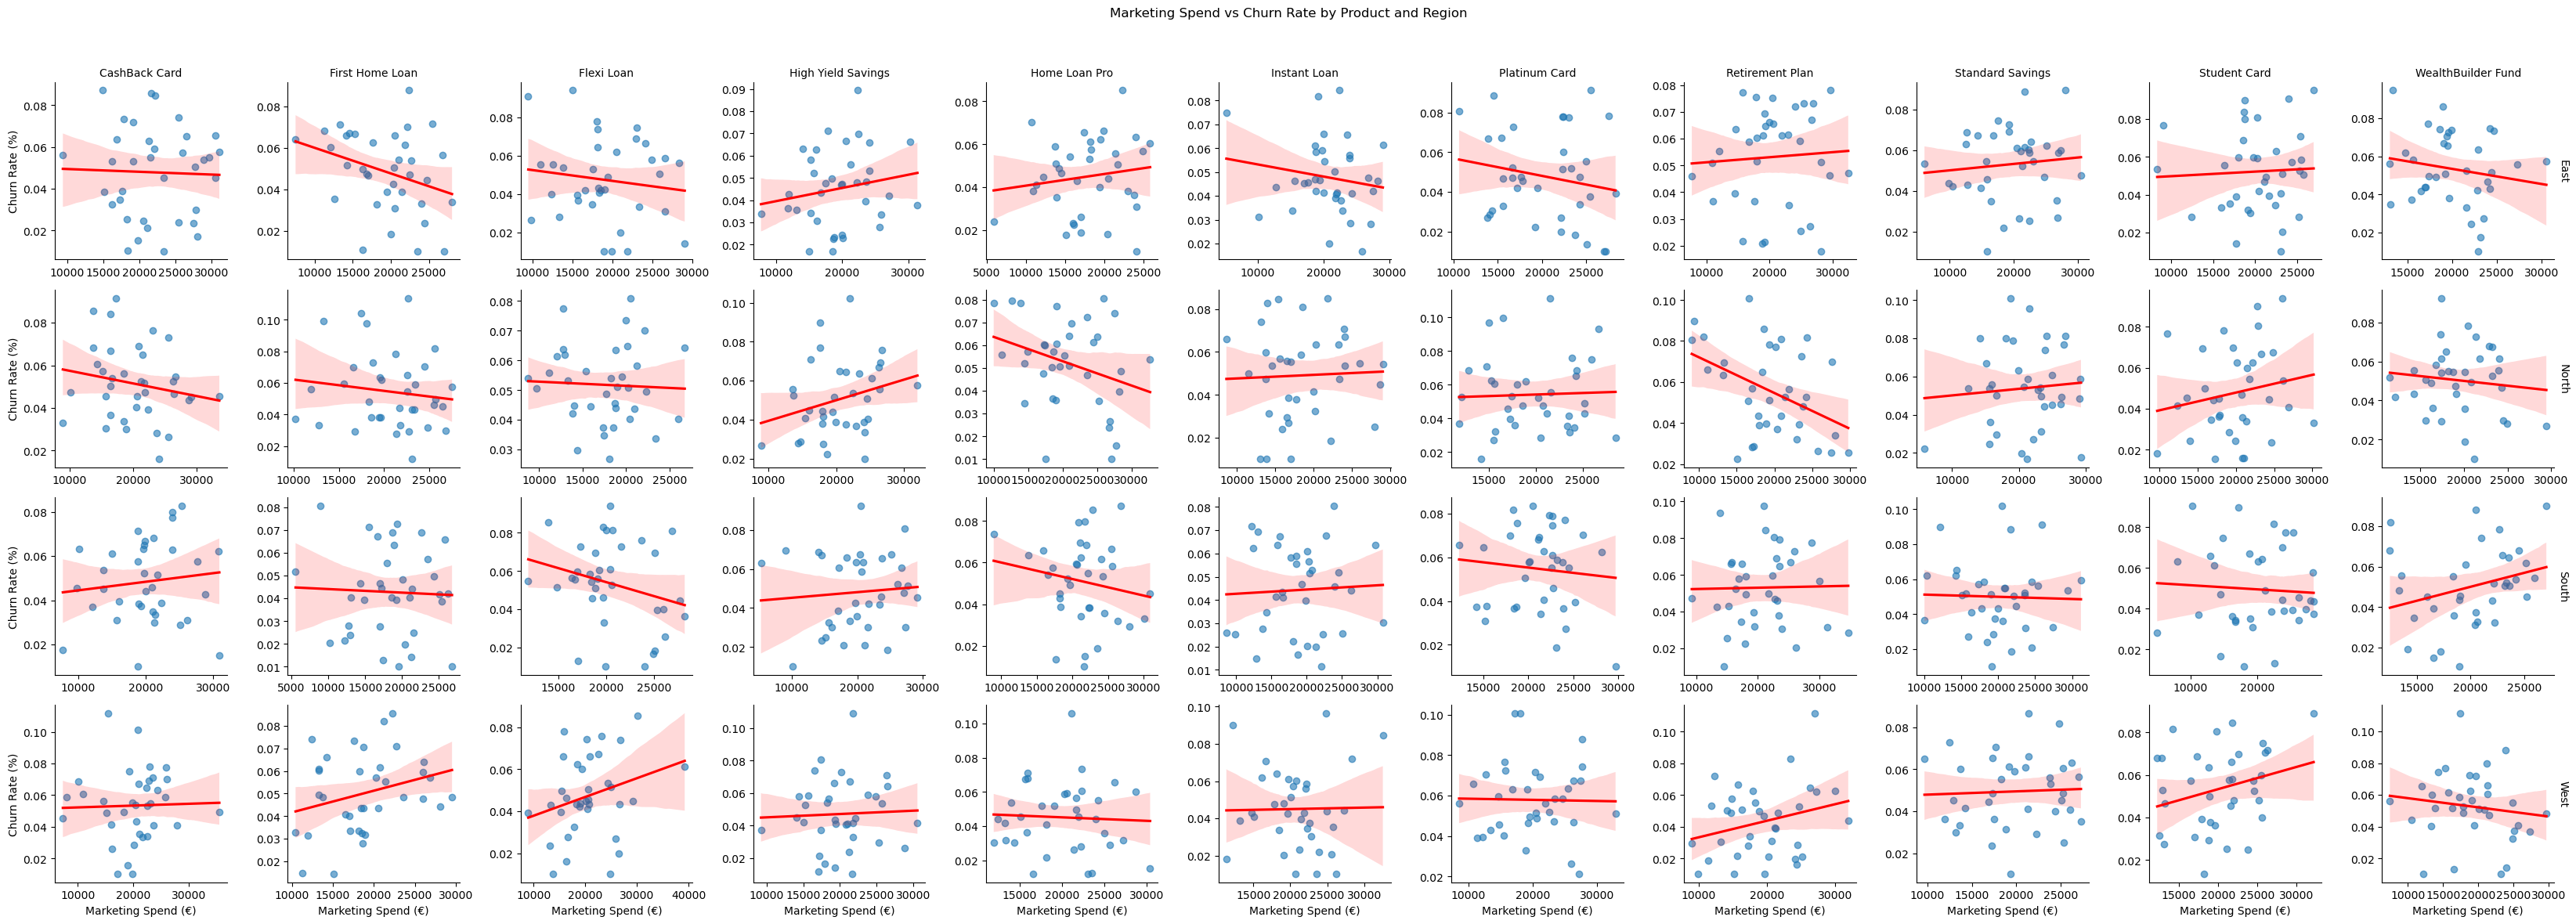

In [50]:
# --- 6. Marketing Spend vs. Churn Rate by Product and Region ---
grouped_churn = df.groupby(['product_name', 'region', 'date']).agg({
    'marketing_spend': 'sum',
    'churn_rate': 'mean'  # average churn rate
}).reset_index()

g = sns.FacetGrid(grouped_churn, row='region', col='product_name', height=3, margin_titles=True, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='marketing_spend', y='churn_rate', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
g.set_axis_labels("Marketing Spend (€)", "Churn Rate (%)")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Marketing Spend vs Churn Rate by Product and Region')
plt.show()

## 7. Revenue vs. Marketing Spend by Product Type and Region

We group our data by product type and region to gain a broader understanding of which product categories yield higher returns on marketing investment. This aggregation provides strategic insights into portfolio performance by market.

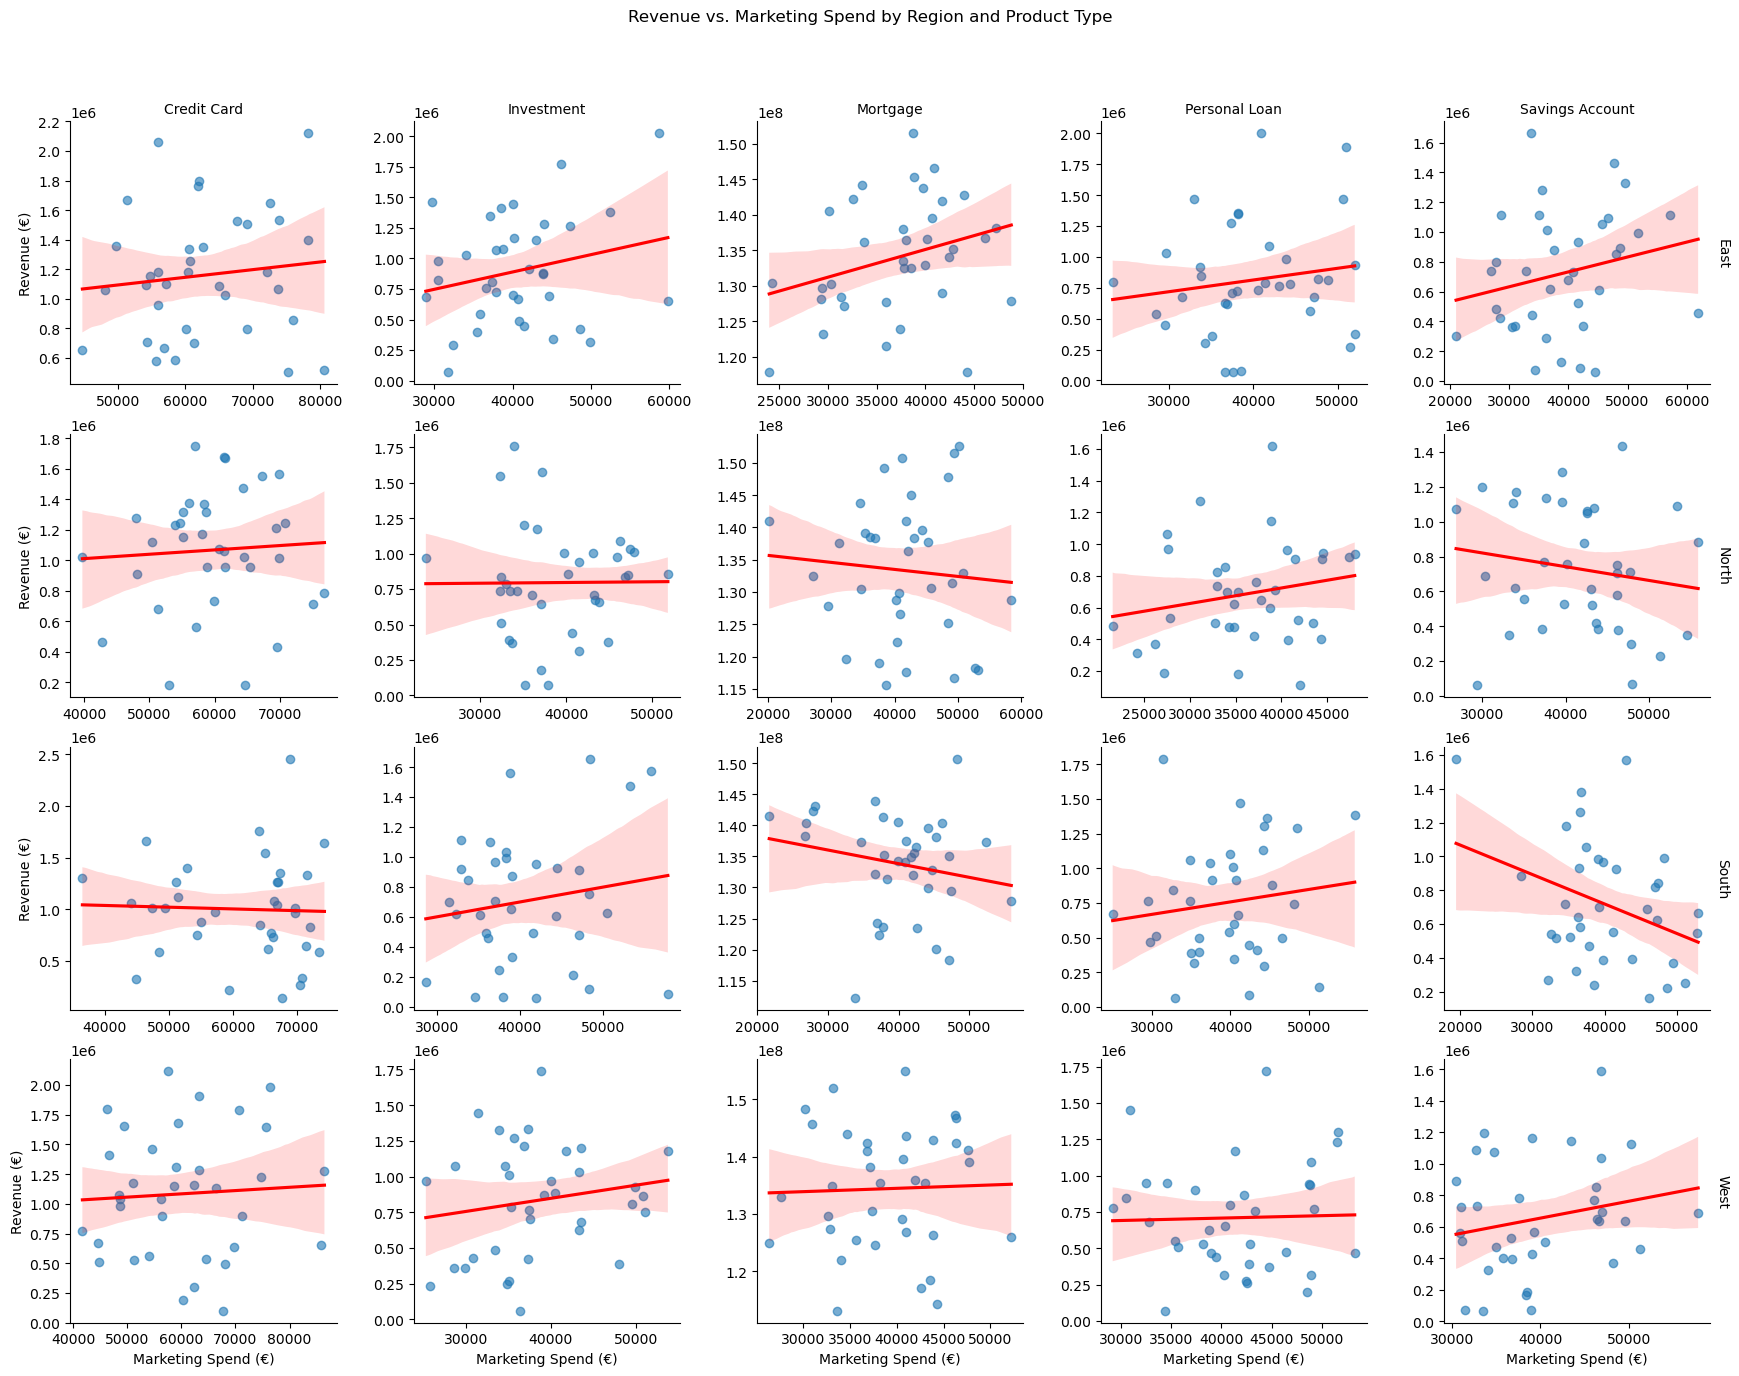

In [51]:
# --- 7. Revenue vs. Marketing Spend by Region and Product Type ---
grouped_type_region = df.groupby(['region', 'product_type', 'date']).agg({
    'marketing_spend': 'sum',
    'revenue': 'sum'
}).reset_index()

g = sns.FacetGrid(grouped_type_region, row="region", col="product_type", height=3.5, margin_titles=True, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x="marketing_spend", y="revenue", scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
g.set_axis_labels("Marketing Spend (€)", "Revenue (€)")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Revenue vs. Marketing Spend by Region and Product Type")
plt.show()

## 8. Revenue vs. Marketing Spend by Region

To zoom out further, we look at total marketing spend and revenue by region. This helps identify which regions deliver the best returns and where marketing efficiency could be improved.

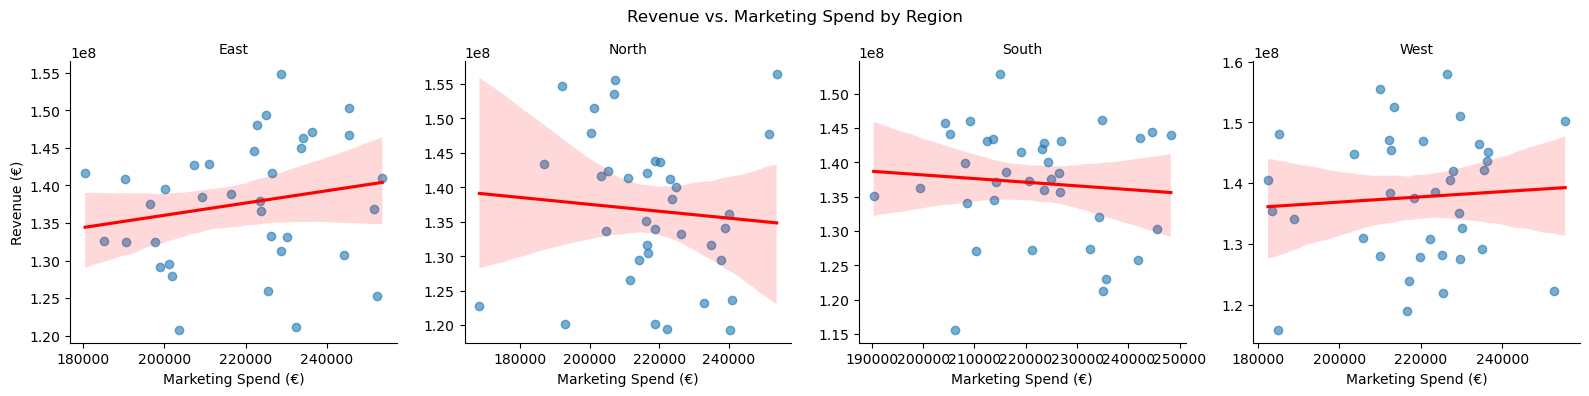

In [53]:
# --- 8. Revenue vs. Marketing Spend by Region Only ---
region_grouped = df.groupby(['region', 'date']).agg({
    'marketing_spend': 'sum',
    'revenue': 'sum'
}).reset_index()

g = sns.FacetGrid(region_grouped, col="region", height=4, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x="marketing_spend", y="revenue", scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
g.set_axis_labels("Marketing Spend (€)", "Revenue (€)")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Revenue vs. Marketing Spend by Region")
plt.show()

## 8. Reflection – Relationship Heterogeneity Across Segments

The visualizations reveal that the strength and direction of relationships between marketing spend, revenue, and churn are highly heterogeneous across regions and products. This suggests that a one-size-fits-all model may not work, and future analysis should consider segmentation or clustering approaches instead of global predictions.